# Newton's law of cooling

The model states that the rate of cooling of a warm body without internal heating is proportional to the temperature difference between the body of interest and the ambient temperature. As a result, the temperature of the body with respect to its surroundings decreases exponentially with time.

$$\frac{dT}{dt}=-K(T_{obj} - T_{amb}) $$


$\frac{dT}{dt}$ Rate of change of temperature

$-K$ Newton's cooling constant of proportionality (found empirically)

$T_{obj}$ Temperature of the medium of interest

$T_{amb}$ Ambient temperature. Assumed to be constant and not affected by the object's temperature

The equation can be solved analytically or numerically. To practice `for loops` we will implement the solution numerically by discretizing the equation into one minute intervals. This means that the rate of cooling at time $t$ will be approximated by using the temperature of the object at time $t-1$. Numerical solutions are just approximations, but if we carefully select the time step and the way in which we conduct the iteration process, then the results can be extremely accurate. In more formal terms:

$$\frac{\Delta T}{\Delta t} \approx \frac{dT}{dt}=-K(T_{obj} - T_{amb}) $$



>Note that this law does not apply to homeotherm (opposite to poikilotherm) animals. For that case you may want to consider using Fourier's law of heat flow. For more details refer to Kleiber 1972. Some considerations for using this equation for homeotherms is given by Tracy 1972, in which a time-dependent constant of proportionality is suggested as a function of the changing environmental conditions (e.g. wind speed).

In case you are interested, a large portion of Newton's research notes have been digitized by [Cambridge University Library](https://cudl.lib.cam.ac.uk/collections/newton/1). I highly encourage you to take a look at such wonderful collection from one of the greatest scientists of all time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Define initial conditions of the system
dt = 1 # minutes
period = 121 # minutes
t_cup_pred = range(period)# minutes
T_cup_pred = [70] # Celsius
T_amb = 22.5 # Celsius
K = 0.022 # 1/minutes


In [6]:
# Implement iterative solution
for t in range(1,period):
    dT = -K*(T_cup_pred[t-1] - T_amb)*dt # Change in temperature of object
    T_cup_pred_update = T_cup_pred[t-1] + dT # New temperature for current time step
    T_cup_pred.append(T_cup_pred_update)


In [55]:
# Alternative one-line solution using the [-1] indexing operator
T_cup_pred = [70]
for t in range(1,period):
    T_cup_pred.append(T_cup_pred[-1] + -K*(T_cup_pred[-1] - T_amb)*dt)
    

In [7]:
# Observations using hot water in a regular ceramic mug
T_cup_obs = [70,69,67,65,64,63,62.5,61.5,60.7,60,59,55,52.1,49.3,47,43,39.5,36.5,34.3,28]
t_cup_obs = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,40,50,60,70,120]


In [8]:
# A way to compute the mean absolute error (MAE) of the model
E = np.take(T_cup_pred,t_cup_obs) - T_cup_obs # Compute error
MAE = np.mean(np.abs(E)) # Compute mean absolute error in Celsius
print(round(MAE,2), 'degrees Celsius')


1.27 degrees Celsius


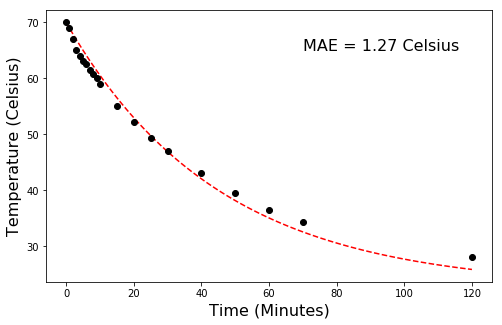

In [9]:
plt.figure(figsize=(8,5))
plt.plot(t_cup_pred, T_cup_pred, '--r')
plt.plot(t_cup_obs, T_cup_obs, 'ok')  
plt.xlabel('Time (Minutes)', size=16)
plt.ylabel('Temperature (Celsius)', size=16)
plt.annotate('MAE = ' + str(round(MAE,2)) + ' Celsius', (70,65), size=16 )
#plt.savefig('myplot.jpg') # Save figure before rendering to avoid blank image
plt.show()


An object at 180 degrees Celsius is submersed into a water bath kept at a constant temperature of 30 degrees Celsius. From a previous pilot experiment using the same object and the same water bath, it is known that after 1 minute the temperature of the object drops to 150 degrees Celsius. How long will take until the object is within 1 degree Celsius of the water bath (i.e. near equilibrium conditions).


In [11]:
T_cup_pred = 180
T_target = 90
K = np.log(2)
dt = 0.1
counter = 0
while T_cup_pred > T_target:
    T_cup_pred = T_cup_pred - K*(T_cup_pred - 60)*dt
    counter += dt


print(counter,T_cup_pred)

2.0000000000000004 88.52582180140108


$$ \frac{dT}{dt} = -k(T - T_{env})$$

Using separation of variables we first obtain:

$$ \frac{dT}{T-T_{env}} = -k dt $$

and integrating using observations during the pilot experiment to find the thermal conductivity:

$$ \int_{T=180}^{120}  \frac{dT}{T-60} = -k \int_{t=0}^{1} dt $$

which results in:

$$ k = log(2) $$

Now that we know $k = log(2)$ based on data from the pilot experiment, we can use the value of $k$ for computing the time for the object to reach any specific temperature 

$$ \int_{T=90}^{180}  \frac{dT}{T-60} = -log(2) \int_{t=0}^{t} dt $$



In [77]:
import sympy as sp
t,T,k = sp.symbols('t T k')

In [78]:
# Variables
T_initial = 180
T_target = 90
T_env = 60

# Using the data for the pilot experiment we first integrate to compute k
LHS = sp.simplify(sp.integrate(1/(T-60), (T, 180, 120)))
print('LHS = ',LHS)

RHS = sp.integrate(-k, (t, 0, 1))
print('RHS = ',RHS)

k = sp.solve(sp.Eq( LHS,RHS ), k)
print('The value of k is:',k[0])

LHS =  -log(2)
RHS =  -k
The value of k is: log(2)


In [79]:
LHS2 = sp.simplify(sp.integrate(1/(T-60), (T, 180, 90)))
print(LHS2)

RHS2 = sp.integrate(-k[0], (t, 0, t))
print(RHS2)

-log(4)
-t*log(2)


In [82]:
solution = solve(Eq(LHS2,RHS2),t)
print('It will take',solution,'minutes for the object to reach a temperature of',T_target,'degrees Celsius')

It will take [2] minutes for the object to reach a temperature of 90 degrees Celsius


## Practice

- Using a cooking thermometer to regularly record the temperature of a hot cup of coffee or te as it cools down. You may want to take readings frequently (e.g. every minute) at the beginning that is when the water cools down rapidly. Use the observations of time and temperature to fit Newton's law of cooling. Everytime you take a temperature reading also take a sip and take some notes on whether the beverage is too hot, too cold, or at desirable temperature. Using the collected observations, calculate how many minutes you have to drink the coffee/te before it gets too cold.

## References

Kleiber, M., 1972. A new Newton's law of cooling?. Science, 178(4067), pp.1283-1285.

Newton, I., 1701. Scala graduum caloris et frigoris. In Phil. Trans. R. Soc.

Tracy, C.R., 1972. Newton's law: its application for expressing heat losses from homeotherms. BioScience, 22(11), pp.656-659.

Vollmer, M., 2009. Newton's law of cooling revisited. European Journal of Physics, 30(5), p.1063.